Forecastimg Gold Price Time Series Exercise 4

In [1]:
# important libraries are installed and imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Loading the Gold price dataset in pandas

In [2]:
df = pd.read_csv("gold_price_data.csv")

In [3]:
# having observed critically
# in the early year, the pattern 
# is every 3 days in a month
df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [4]:
# initially I considered the 
# time span of 20 years (6720)
# before the millenial
# however, I decided to extend 
# it to 3 years prior to 2020
df = df.iloc[0:10080]

In [5]:
df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10075,2017-06-22,1250.80
10076,2017-06-23,1255.70
10077,2017-06-26,1245.25
10078,2017-06-27,1249.55


In [6]:
# in this cell the date is dropped and 
# then replace index with 0.1 steps
df = df.drop("Date", axis=1)
df.index = df.index * 0.1 + 1

In [7]:
# then saving the target value column, 
# as this automatically
# split the data without changes
value_column = "Value"

In [8]:
# let's scale the values with MinMaxScaler, so that we don't
# affect the distribution of data (thus making the signal not be realistic anymore)
# The MinMaxScaler is used
# to help scale the values 
# making the distribution of the data 
# evenly when training the model
scaler = MinMaxScaler()
df[[value_column]] = scaler.fit_transform(df[[value_column]])
df.index = df.index * 0.1 + 1

In [9]:
df

,Value
1.10,0.000054
1.11,0.000000
1.12,0.000161
1.13,0.000591
1.14,0.001237
...,...
101.85,0.653637
101.86,0.656272
101.87,0.650653
101.88,0.652965


Now is to figure out the splitting of the training/test
 X_train, y_train, X_test, y_test

In [10]:
# here,cutoff point is used
# for train/test split
# this reveals the trend in the Value
# and the cutoff is split
# training 0.80 and test 0.20
# begins with a smaller test size
cutoff = int(len(df) * 0.80)

# train data
X_train = df.index[0:cutoff]
y_train = df[value_column].iloc[0:cutoff]

# test data
X_test = df.index[cutoff:]
y_test = df[value_column].iloc[cutoff:]

# convert to NumPy -array -format (expected by the generators)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

n_features = 1

# NOTE to self: is this necessary?
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

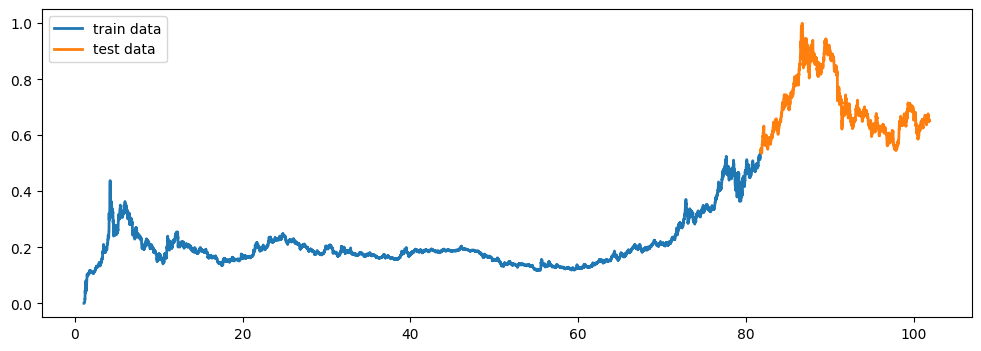

In [11]:
# plot the original train + test data
# see the cutoff point
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(X_train, y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.legend(loc="upper left")
plt.show()